In [1]:
%matplotlib inline
from __future__ import division

import os
import time
import matplotlib.pyplot as plt
import numpy as np
import copy
import scipy.cluster.hierarchy as sch
from scipy.stats import scoreatpercentile 
import matplotlib.image as mpimg
from IPython.display import display
from IPython.display import Image
from Bio.Seq import Seq
from Bio import motifs
import colorsys
import scaTools as sca
import mpld3
import pickle
from optparse import OptionParser

if not os.path.exists('Outputs/'): os.makedirs('Outputs/')  

/homes/psetty/miniconda3/envs/MDH/lib/python3.8/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [55]:
db = pickle.load(open('/homes/psetty/pySCA-MDH/Outputs/aa_seqs_grp3_annotated.db','rb'))
Dseq = db['sequence']  #the results of scaProcessMSA
Dsca = db['sca']       #the results of scaCore
# Dsect = db['sector']   #the results of scaSectorID

### I. Alignment processing and composition

First, we print out a few statistics describing the alignment:

In [56]:
print("After processing, the alignment size is %i sequences and %i positions" % \
      (Dseq['Nseq'], Dseq['Npos']))
print("With sequence weights, there are %i effective sequences" % (Dseq['effseqs']))

After processing, the alignment size is 3700 sequences and 282 positions
With sequence weights, there are 2421 effective sequences


To examine alignment composition, we plot a histogram of all pairwise sequence identities *(left panel)* and a global view of the sequence similarity matrix (defined by $S\equiv \frac{1}{L}XX^\top$) *(right panel)*.  The data show that the alignment is described by a nearly homogeneous distribution of sequence identities with a mean value of about 25%.

In [ ]:
# List all elements above the diagonal (i
listS = [Dsca['simMat'][i,j] for i in range(Dsca['simMat'].shape[0]) \
         for j in range(i+1, Dsca['simMat'].shape[1])]

# Cluster the sequence similarity matrix
Z = sch.linkage(Dsca['simMat'],method = 'complete', metric = 'cityblock')
R = sch.dendrogram(Z,no_plot = True)
ind = R['leaves']

# Plotting
plt.rcParams['figure.figsize'] = 9, 4 
plt.subplot(121)
plt.hist(listS, int(round(Dseq['Npos']/2)))
plt.xlabel('Pairwise sequence identities', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.subplot(122)
plt.imshow(Dsca['simMat'][np.ix_(ind,ind)], vmin=0, vmax=1); plt.colorbar();

### II. <u> First-order statistics: position-specific conservation.  <u/>

Plot the position-specific conservation values for each g-protein position. $D_i$ is calculated according to equation S4 (supplemental information).

In [57]:
m = np.mean(Dsca['Di'])
md = np.median(Dsca['Di'])
sd = np.std(Dsca['Di'])

In [58]:
m

1.0054014669859723

In [59]:
md

0.8813216297204904

In [60]:
sd

0.5237780724965002

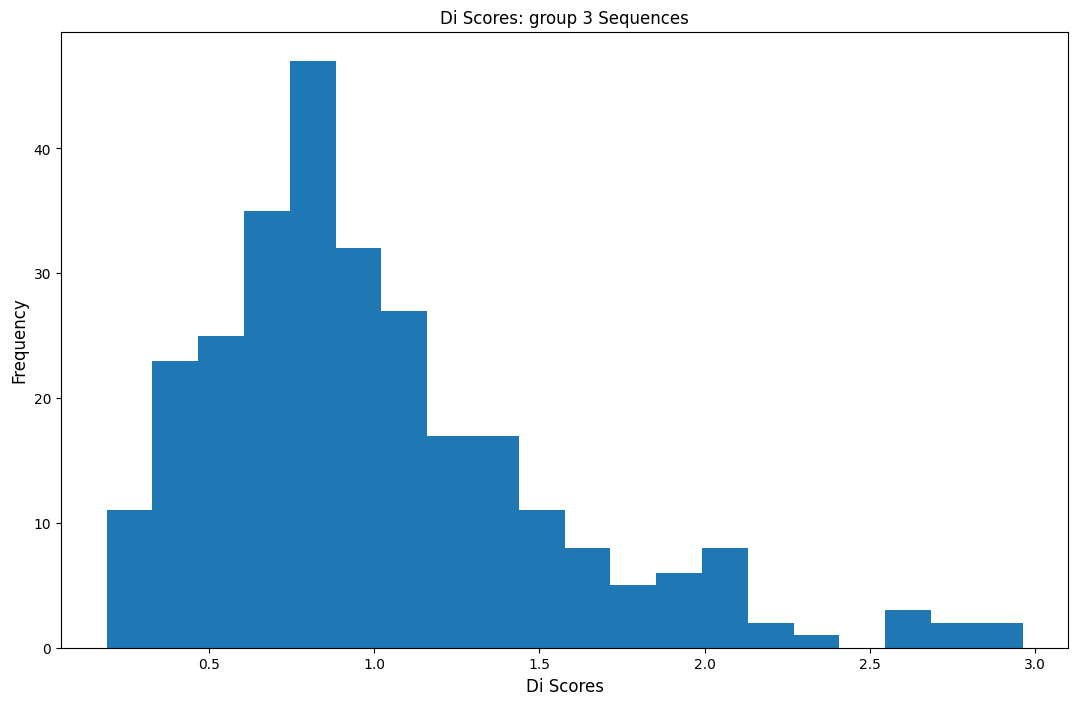

In [63]:
plt.hist(Dsca['Di'],bins=20)
plt.xlabel("Di Scores", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Di Scores: group 3 Sequences")
# plt.plot([], [], label='Mean: {0:.2f}'.format(m), color = 'white')
# plt.plot([], [], label='Median: {0:.2f}'.format(md), color = 'white')
# plt.plot([], [], label='Std: {0:.2f}'.format(sd), color = 'white')
# plt.legend(title='Statistics')
plt.savefig('/homes/psetty/pySCA-MDH/plots/di_grp3.png',dpi = 100)

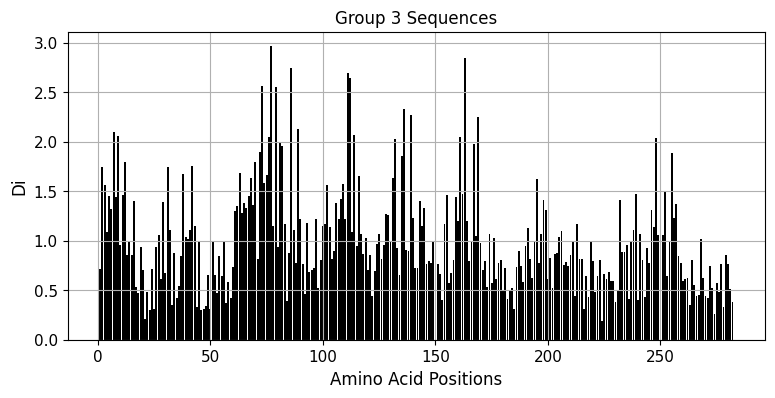

In [65]:
fig, axs = plt.subplots(1,1, figsize=(9,4))
xvals = [i+1 for i in range(len(Dsca['Di']))]
# xticks = [0,45,95,140,200,250,300]
plt.bar(xvals,Dsca['Di'], color='k')
plt.tick_params(labelsize=11); plt.grid()
# axs.set_xticks(xticks);
# labels = [Dseq['ats'][k] for k in xticks]
# axs.set_xticklabels(labels);
plt.xlabel('Amino Acid Positions', fontsize=12)
plt.ylabel('Di', fontsize=12)
plt.title("Group 3 Sequences")
plt.savefig('/homes/psetty/pySCA-MDH/plots/1st_order_stat_grp3.png',dpi = 100)

### III. <u>Second-order statistics: conserved correlations.<u/>

Plot the SCA correlation matrix ( $\tilde{C_{ij}}$ ) computed according to Equations 4+5

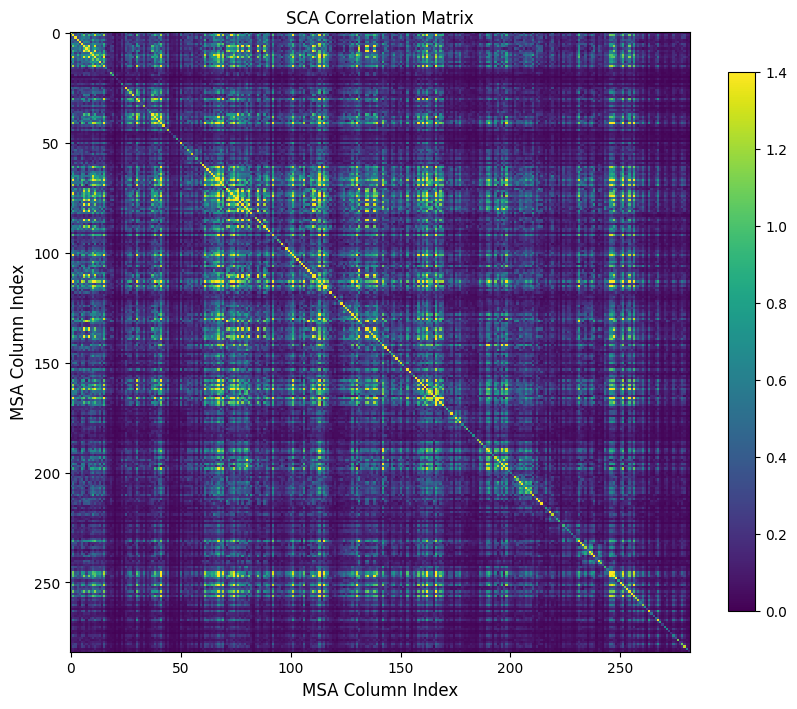

In [66]:
fig, ax = plt.subplots( figsize=(10,10))
plt.rcParams['figure.figsize'] = 13, 8
im = plt.imshow(Dsca['Csca'], vmin=0, vmax=1.4,interpolation='none',\
           aspect='equal')
cbar = ax.figure.colorbar(im, 
                          ax = ax, shrink = 0.7)
plt.xlabel("MSA Column Index",fontsize=12)
plt.ylabel("MSA Column Index",fontsize=12)
plt.title("SCA Correlation Matrix", fontsize=12)
plt.savefig('/homes/psetty/pySCA-MDH/plots/2nd_order_stat_grp3.png',dpi = 100)